# Superstore Sales Workflow Tutorial

This notebook walks through cleaning the Superstore dataset, designing a relational structure, creating an SQLite database, and running example SQL queries and visualizations.

In [152]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

## 1️) Load and Inspect the Dataset

In [153]:
# reading error codes + research is how you can learn if there is different encoding, as seen below
df = pd.read_csv('../data/Superstore.csv', encoding='ISO-8859-1')
df.head()
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Double check some datatypes, and for nulls and duplicates:

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [155]:
df.duplicated().sum()

np.int64(0)

In [156]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [157]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [158]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [159]:
df.rename(columns={"Segment":"customer_category"}, inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,customer_category,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


This data is incredibly clean - we can see there are no null values and no duplicates. However, there are some dates that could be saved in a better format.

## 2) Data Cleaning

In [160]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [161]:
df.dtypes

Row ID                        int64
Order ID                     object
Order Date           datetime64[ns]
Ship Date            datetime64[ns]
Ship Mode                    object
Customer ID                  object
Customer Name                object
customer_category            object
Country                      object
City                         object
State                        object
Postal Code                   int64
Region                       object
Product ID                   object
Category                     object
Sub-Category                 object
Product Name                 object
Sales                       float64
Quantity                      int64
Discount                    float64
Profit                      float64
dtype: object

In [162]:
df.customer_category.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [163]:
df.rename(columns={"Segment":"customer_category"}, inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,customer_category,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


With real data, it is very likely more cleaning and wrangling would be required. 

## 3) Build Relational Tables

In [164]:
conn = sqlite3.connect('../data/superstore.db')

customers_df = df[['Customer ID','Customer Name','customer_category','City','State','Region', 'Postal Code']].drop_duplicates().rename(columns={
    'Customer ID':'customer_id',
    'Customer Name':'customer_name',
    'City':'city',
    'State':'state',
    'Region':'region',
    'Postal Code': 'zipcode'
})

products_df = df[['Product ID','Category','Sub-Category','Product Name']].drop_duplicates().rename(columns={
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'subcategory',
    'Product Name':'product_name'
})

orders_df = df[['Order ID','Order Date','Ship Date','Ship Mode','Customer ID']].drop_duplicates().rename(columns={
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id'
})

order_details_df = df[['Order ID','Product ID','Sales','Quantity','Discount','Profit']].rename(columns={
    'Order ID':'order_id',
    'Product ID':'product_id'
})


customers_df.to_sql('customers', conn, index=False, if_exists='replace')
products_df.to_sql('products', conn, index=False, if_exists='replace')
orders_df.to_sql('orders', conn, index=False, if_exists='replace')
order_details_df.to_sql('order_details', conn, index=False, if_exists='replace')
conn.commit()

In [165]:
for name, df in [
    ('customers', customers_df),
    ("products", products_df),
    ("orders", orders_df),
    ("order_details", order_details_df)
]:
    df.to_csv(f'../data/{name}.csv')

## 4) Make Some Queries!

### Which customer segments bring in the most revenue and profit?

In [166]:
query1 = """ SELECT 
    c.customer_category,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_category
ORDER BY total_sales DESC;
"""
result1 = pd.read_sql(query1, conn)
result1

,customer_category,total_sales,total_profit
0,Consumer,8380282.43,973085.86
1,Corporate,5044899.83,660287.69
2,Home Office,2964459.36,434344.01


### What are the top 10 customers by total sales?

In [167]:
query2 = """
SELECT
    c.customer_name,
    ROUND(SUM(od.sales), 2) AS total_sales
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_id, c.customer_name
ORDER BY total_sales DESC
LIMIT 10;
"""
result2 = pd.read_sql(query2, conn)
result2

,customer_name,total_sales
0,Ken Lonsdale,155927.52
1,Sanjit Engle,134303.82
2,Clay Ludtke,130566.55
3,Adrian Barton,130262.14
4,Sanjit Chand,127281.01
5,Sean Miller,125215.25
6,Edward Hooks,123730.56
7,Greg Tran,118201.20
8,Seth Vernon,114709.50
9,John Lee,107799.15


### Which product categories and subcategories are the most profitable overall?

In [168]:
query3 = """
SELECT
    p.category,
    p.subcategory,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.category, p.subcategory
ORDER BY total_profit DESC;
"""
result3 = pd.read_sql(query3, conn)
result3

,category,subcategory,total_profit
0,Technology,Copiers,55617.82
1,Technology,Accessories,48359.05
2,Technology,Phones,46936.19
3,Office Supplies,Paper,36994.53
4,Office Supplies,Binders,30373.20
5,Furniture,Chairs,26707.65
6,Office Supplies,Storage,21408.70
7,Office Supplies,Appliances,18514.49
8,Furniture,Furnishings,14569.59
9,Office Supplies,Envelopes,6964.18


### What is the average discount given per category?

In [169]:
query4 = """
SELECT
    p.category,
    ROUND(AVG(od.discount) * 100, 2) AS avg_discount_pct
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.category
ORDER BY avg_discount_pct DESC;
"""
result4 = pd.read_sql(query4, conn)
result4

,category,avg_discount_pct
0,Furniture,17.25
1,Office Supplies,15.70
2,Technology,13.30


### Which states or regions contribute the most to total sales?

In [170]:
query5 = """
SELECT
    c.state,
    c.region,
    ROUND(SUM(od.sales), 2) AS total_sales
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.state, c.region
ORDER BY total_sales DESC
LIMIT 10;
"""
result5 = pd.read_sql(query5, conn)
result5

,state,region,total_sales
0,California,West,3314837.69
1,New York,East,1859365.37
2,Texas,Central,1547925.76
3,Pennsylvania,East,886105.68
4,Washington,West,862298.69
5,Illinois,Central,843352.76
6,Ohio,East,707747.69
7,Florida,South,635637.78
8,North Carolina,South,437938.43
9,Michigan,Central,432428.02


### How many orders were shipped late (where Ship Date > Order Date + 3 days)?

In [171]:
query6 = """
SELECT
    COUNT(*) AS late_orders,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM orders), 2) AS pct_of_total
FROM orders
WHERE julianday(ship_date) - julianday(order_date) > 3;
"""
result6 = pd.read_sql(query6, conn)
result6

,late_orders,pct_of_total
0,3391,67.7


### Which month or year had the highest total sales?

In [172]:
query7 = """
SELECT
    strftime('%Y', o.order_date) AS year,
    strftime('%m', o.order_date) AS month,
    ROUND(SUM(od.sales), 2) AS total_sales
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
GROUP BY year, month
ORDER BY total_sales DESC
LIMIT 10;
"""
result7 = pd.read_sql(query7, conn)
result7

,year,month,total_sales
0,2014,11,112326.47
1,2013,12,97237.42
2,2014,09,90488.72
3,2014,12,90474.60
4,2013,11,82192.32
5,2011,09,81777.35
6,2011,11,78628.72
7,2014,10,77793.76
8,2012,11,75972.56
9,2012,12,74919.52


### What are the most frequently ordered products?

In [173]:
query8 = """
SELECT
    p.product_name,
    p.category,
    COUNT(*) AS order_count
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.product_id, p.product_name
ORDER BY order_count DESC
LIMIT 10;
"""
result8 = pd.read_sql(query8, conn)
result8

,product_name,category,order_count
0,Xerox 1881,Office Supplies,19
1,Xerox 1908,Office Supplies,19
2,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,Technology,18
3,Logitech P710e Mobile Speakerphone,Technology,18
4,"Eldon Image Series Desk Accessories, Burgundy",Furniture,16
5,"Executive Impressions 13"" Clairmont Wall Clock",Furniture,16
6,"Global Task Chair, Black",Furniture,15
7,"Global Value Mid-Back Manager's Chair, Gray",Furniture,15
8,"Situations Contoured Folding Chairs, 4/Set",Furniture,15
9,Logitech G19 Programmable Gaming Keyboard,Technology,15


### Which customers placed more than 5 orders total?

In [174]:
query9 = """
SELECT
    c.customer_name,
    COUNT(DISTINCT o.order_id) AS order_count
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY o.customer_id, c.customer_name
HAVING order_count > 5
ORDER BY order_count DESC;
"""
result9 = pd.read_sql(query9, conn)
result9

,customer_name,order_count
0,Emily Phan,17
1,Chloris Kastensmidt,13
2,Erin Ashbrook,13
3,Joel Eaton,13
4,Noel Staavos,13
...,...,...
459,Todd Sumrall,6
460,Tony Sayre,6
461,Victoria Brennan,6
462,Valerie Dominguez,6


### What’s the profit margin (profit ÷ sales) by category or segment?

In [175]:
query10 = """
SELECT
    p.category,
    ROUND(SUM(od.profit) / SUM(od.sales) * 100, 2) AS profit_margin_pct
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.category
ORDER BY profit_margin_pct DESC;
"""
result10 = pd.read_sql(query10, conn)
result10

,category,profit_margin_pct
0,Technology,17.17
1,Office Supplies,17.12
2,Furniture,2.63


### 5) Visualize it!

From your ten results, select at least 4 to utilize in a meaningful visualization. 

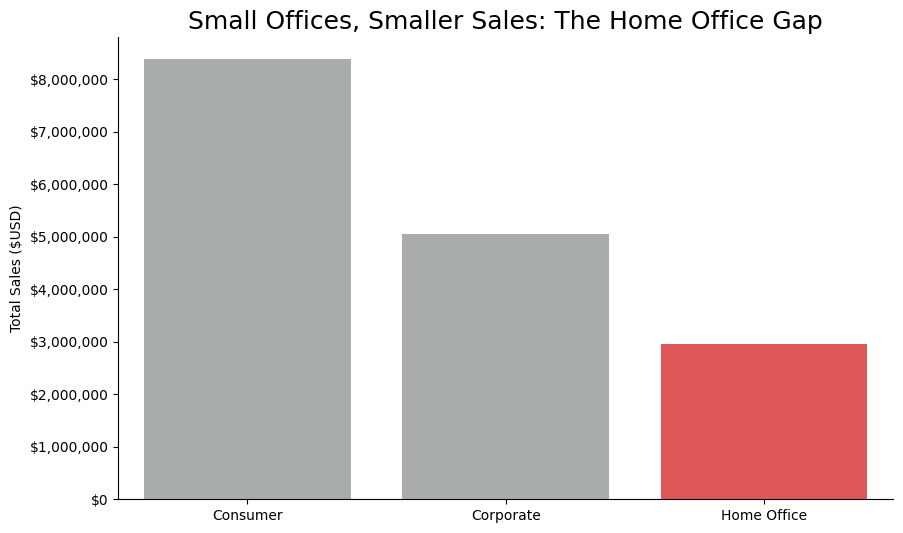

In [176]:
# example using result1
plt.figure(figsize=(10,6))
colors = ["#a7adaa", "#a7adaa", "#f74141" ]
sns.barplot(result1, x='customer_category', y='total_sales', palette=colors, hue='customer_category', legend=False)
plt.title('Small Offices, Smaller Sales: The Home Office Gap',fontsize=18)
plt.xlabel(None)
plt.ylabel('Total Sales ($USD)')

#for those wondering how to get rid of scientific notation! Set style to plain:
plt.ticklabel_format(style='plain', axis='y')

#mticker is a great library for helping tick mark formatting, such as adding commas and dollar signs in this case
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

#using the seaborn library, despining is way easier!
sns.despine()
plt.show()


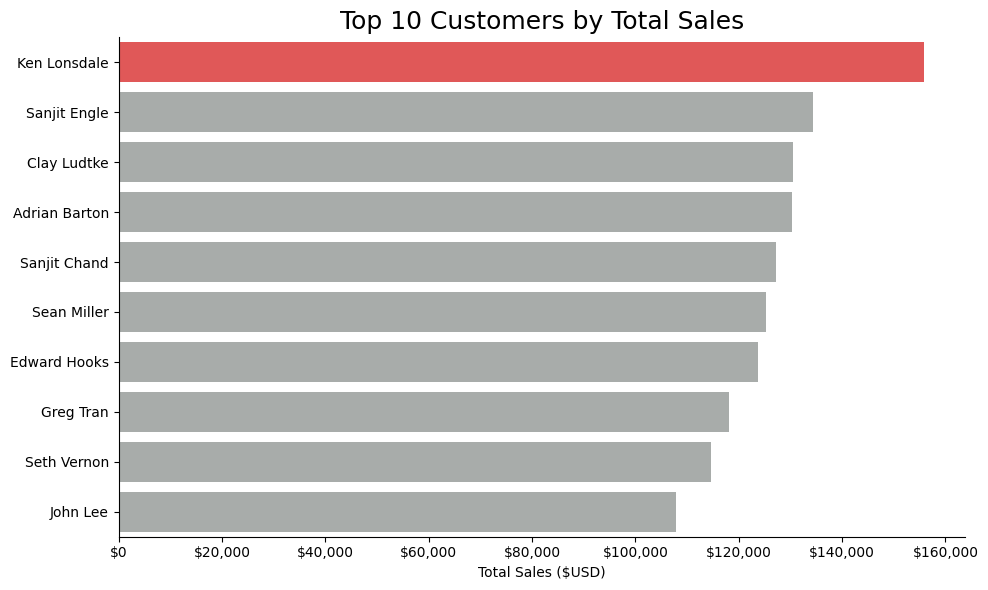

In [177]:
# visualization one: Top 10 customers by total sales
plt.figure(figsize=(10, 6))
colors = ['#f74141' if i == 0 else '#a7adaa' for i in range(len(result2))]
sns.barplot(result2, x='total_sales', y='customer_name', palette=colors, hue='customer_name', legend=False)
plt.title('Top 10 Customers by Total Sales', fontsize=18)
plt.xlabel('Total Sales ($USD)')
plt.ylabel(None)
plt.ticklabel_format(style='plain', axis='x')
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
sns.despine()
plt.tight_layout()
plt.show()

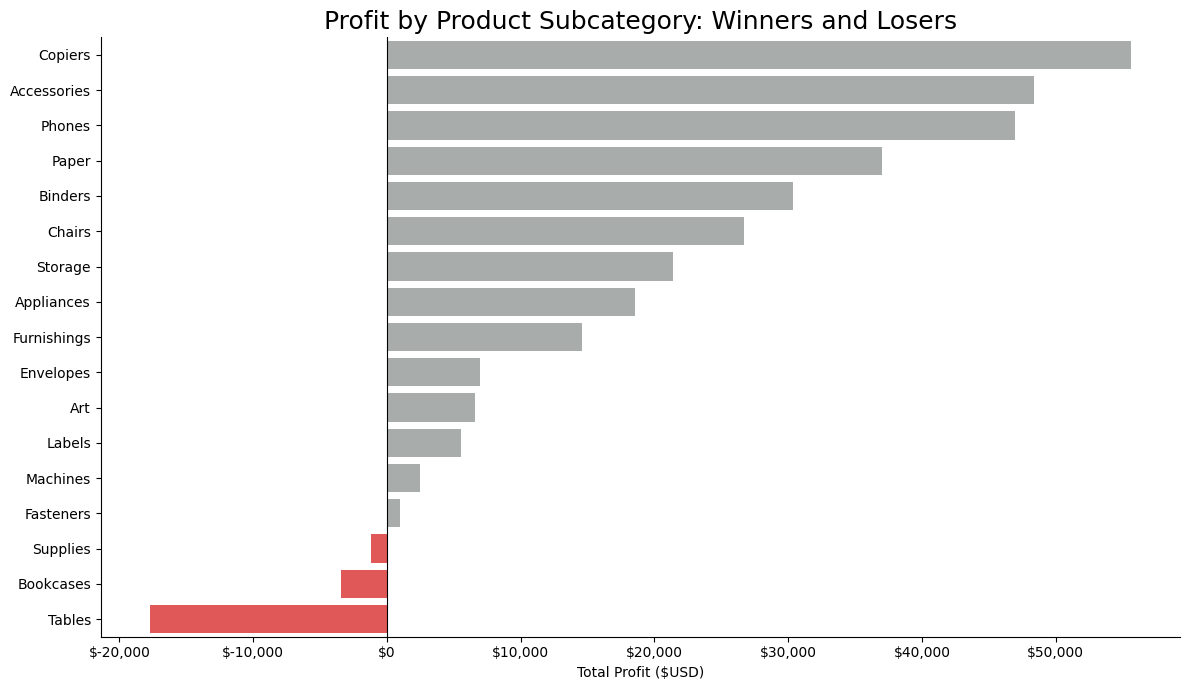

In [178]:
# visualization two: Profit by subcategory
plt.figure(figsize=(12, 7))
colors = ['#f74141' if v < 0 else '#a7adaa' for v in result3['total_profit']]
sns.barplot(result3, x='total_profit', y='subcategory', palette=colors, hue='subcategory', legend=False)
plt.title('Profit by Product Subcategory: Winners and Losers', fontsize=18)
plt.xlabel('Total Profit ($USD)')
plt.ylabel(None)
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.axvline(0, color='black', linewidth=0.8)
sns.despine()
plt.tight_layout()
plt.show()

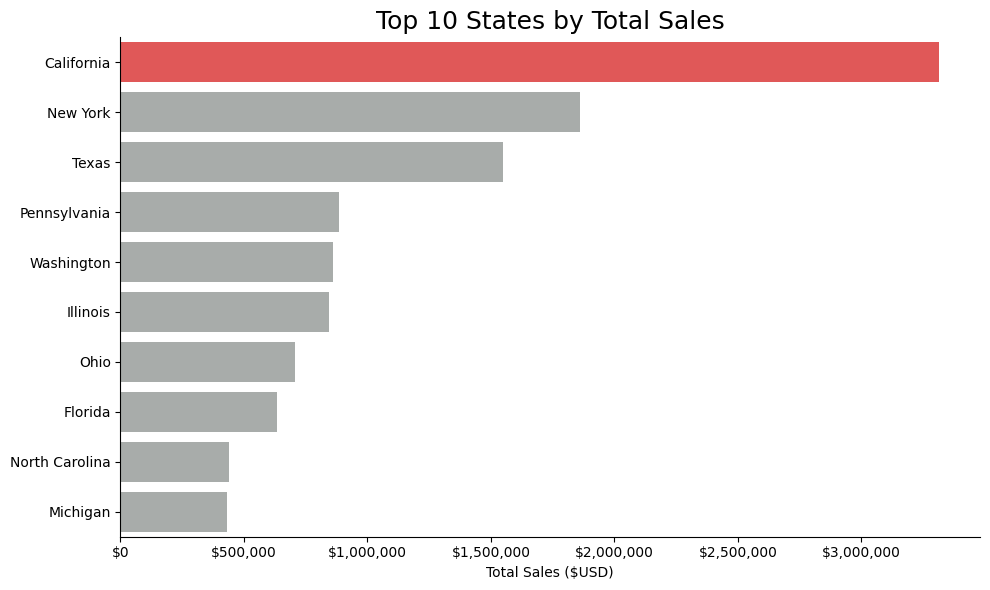

In [179]:
# visualization three: Top 10 states by total sales
plt.figure(figsize=(10, 6))
colors = ['#f74141' if i == 0 else '#a7adaa' for i in range(len(result5))]
sns.barplot(result5, x='total_sales', y='state', palette=colors, hue='state', legend=False)
plt.title('Top 10 States by Total Sales', fontsize=18)
plt.xlabel('Total Sales ($USD)')
plt.ylabel(None)
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
sns.despine()
plt.tight_layout()
plt.show()

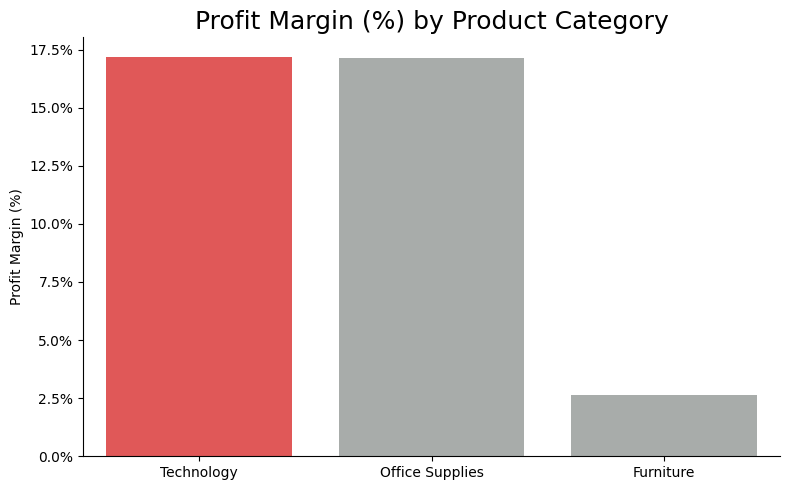

In [180]:
# visualization four: Profit margin by category
plt.figure(figsize=(8, 5))
colors = ['#f74141' if i == 0 else '#a7adaa' for i in range(len(result10))]
sns.barplot(result10, x='category', y='profit_margin_pct', palette=colors, hue='category', legend=False)
plt.title('Profit Margin (%) by Product Category', fontsize=18)
plt.xlabel(None)
plt.ylabel('Profit Margin (%)')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.1f}%'))
sns.despine()
plt.tight_layout()
plt.show()

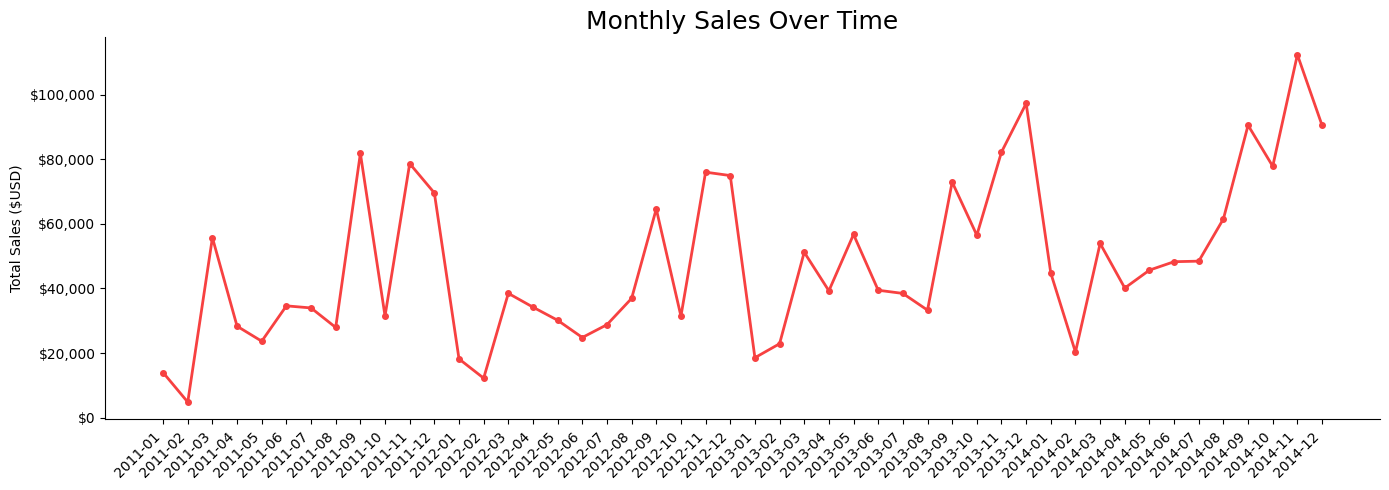

In [181]:
# Monthly Sales Over Time (line chart)
query7_time = """
SELECT
    strftime('%Y', o.order_date) AS year,
    strftime('%m', o.order_date) AS month,
    ROUND(SUM(od.sales), 2) AS total_sales
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
GROUP BY year, month
ORDER BY year, month;
"""
result7_time = pd.read_sql(query7_time, conn)
result7_time['date'] = result7_time['year'] + '-' + result7_time['month']

plt.figure(figsize=(14, 5))
plt.plot(result7_time['date'], result7_time['total_sales'], color='#f74141', linewidth=2, marker='o', markersize=4)
plt.title('Monthly Sales Over Time', fontsize=18)
plt.xlabel(None)
plt.ylabel('Total Sales ($USD)')
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
sns.despine()
plt.tight_layout()
plt.show()